In [13]:
import numpy as np
import qutip as qt
import scipy.stats as sp
import matplotlib.pyplot as plt
import random
import itertools
import time

In [14]:
### CONVERGENCE ###
n_q = 2 # number of Qubits - fixed in this implementation
dim = 2**n_q # dimension of Hilbert space

# experiment in Pauli basis
n_meas = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1028] # number of measurements
meas_rep = 8 # number of repetition

# sampling number
n = 10000
rep_prep = 16

# cut off
threshold = 1 / n**3

In [20]:
fid = np.load('data/fid0604.npy')
n_ess = np.load('data/ness0604.npy')
t = np.load('data/t0604.npy')
w_rho = np.load('data/w0604.npy')

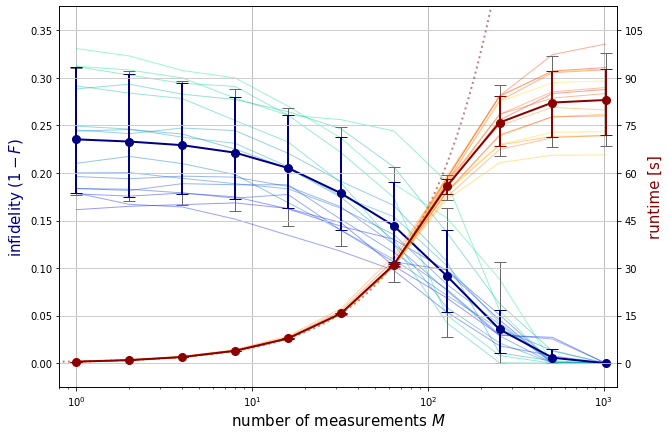

In [21]:
tt = np.concatenate((t[:, 0:13, :], t[:, 14:, :]), axis=1)

fid_avg = np.average(1 - fid, axis=(1, 2))
fid_8_total = [fid_avg - np.percentile(1 - fid, 87.5, axis=(1, 2)), np.percentile(1 - fid, 12.5, axis=(1, 2)) - fid_avg]
fid_8_prep = [fid_avg - np.percentile(np.average(1 - fid, axis=2), 87.5, axis= 1), np.percentile(np.average(1 - fid, axis=2), 12.5, axis=1) - fid_avg]

t_avg = np.average(tt, axis=(1, 2))
t_8_total = [t_avg - np.percentile(tt, 87.5, axis=(1, 2)), np.percentile(tt, 12.5, axis=(1, 2)) - t_avg]
t_8_prep = [t_avg - np.percentile(np.average(tt, axis=2), 87.5, axis= 1), np.percentile(np.average(tt, axis=2), 12.5, axis=1) - t_avg]

# Plot fidelities
fig, ax1 = plt.subplots(figsize=(10, 7))
ax2 = ax1.twinx()

m_s = 8
cmap = plt.get_cmap('winter')
c_ind = np.argsort(np.average(1 - fid[0, :, :], axis=1))                         
for c_i, i in enumerate(c_ind):
    ax1.plot(n_meas, np.average(1 - fid[:, i, :], axis=1),  c= cmap(c_i /len(fid[1])), ls='-', marker='o', ms= 0, lw= 1, alpha=0.4)    
ax1.errorbar(n_meas, fid_avg, yerr= fid_8_total, ls='-', ms= 0, c= 'dimgrey', lw= 0, capsize=6, elinewidth=1)
ax1.errorbar(n_meas, fid_avg, yerr= fid_8_prep, ls='-', marker='o', ms= m_s, c='navy', lw= 2, capsize=6, elinewidth=2)
#ax1.errorbar(n_meas, fid_avg, yerr= fid_8_total, marker='o', ms= m_s, c= 'navy', lw= 0, capsize=0, elinewidth=0)

m_s = 8
cmap = plt.get_cmap('autumn')

coef = np.polyfit(n_meas[:6], np.average(tt[:6], axis=(1,2)), 1)[0] 
x_t = np.linspace(0, n_meas[-1], 1000)
ax2.plot(x_t, coef * x_t, ls=':', c='darkred', lw= 2, alpha= 0.5)

for c_i, i in enumerate(c_ind):
    if i!= 13: ax2.plot(n_meas, np.average(t[:, i, :], axis=1),  c= cmap(c_i /len(fid[1])), ls='-', marker='o', ms= 0, lw= 1, alpha=0.4)    
ax2.errorbar(n_meas, t_avg, yerr= t_8_total, ls='-', ms= 0, c= 'dimgrey', lw= 0, capsize=6, elinewidth=1)
ax2.errorbar(n_meas, t_avg, yerr= t_8_prep, ls='-', marker='o', ms= m_s, c='darkred', lw= 2, capsize=6, elinewidth=2)
#ax2.errorbar(n_meas, t_avg, yerr= t_8_total, marker='o', ms= m_s, c= 'darkred', lw= 0, capsize=0, elinewidth=0)

fs = 15
ax1.set_xscale('log', base=10)
ax1.set_xlim(0.8, 1200)
ax1.set_xlabel(r'number of measurements $M$', fontsize=fs)
ax1.set_xticks([1, 10, 100, 1000], fontsize=fs)
ax1.set_ylabel(r'infidelity ($1-F$)', fontsize=fs, c= 'navy')
ax1.set_yticks(np.linspace(0, 0.35, 8), fontsize=fs)
ax1.set_ylim(-0.025, 0.375)
ax1.grid()

ax2.set_ylabel(r'runtime [s]', fontsize=fs, c= 'darkred')
ax2.set_yticks(np.linspace(0, 105, 8), fontsize=fs)
ax2.set_ylim(-7.5, 112.5)

plt.grid(c='lightgray')
plt.show()

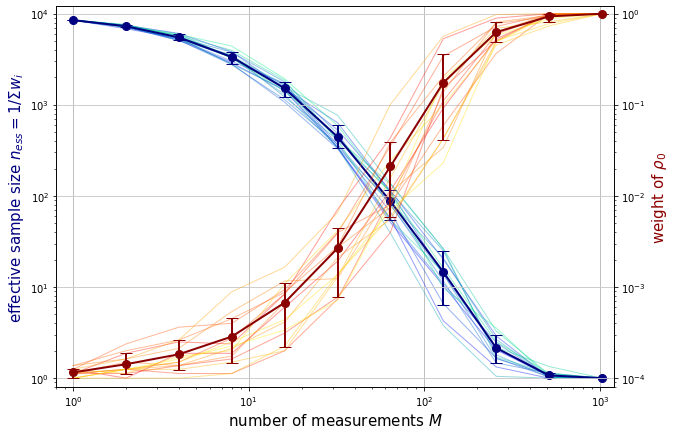

In [22]:
n_ess_avg = np.average(n_ess, axis=(1, 2))
n_ess_8_total = [n_ess_avg - np.percentile(n_ess, 87.5, axis=(1, 2)), np.percentile(n_ess, 12.5, axis=(1, 2)) - n_ess_avg]
n_ess_8_prep = [n_ess_avg - np.percentile(np.average(n_ess, axis=2), 87.5, axis= 1), np.percentile(np.average(n_ess, axis=2), 12.5, axis=1) - n_ess_avg]

w_avg = np.average(w_rho, axis=(1, 2))
w_8_total = [w_avg - np.percentile(w_rho, 87.5, axis=(1, 2)), np.percentile(w_rho, 12.5, axis=(1, 2)) - w_avg]
w_8_prep = [w_avg - np.percentile(np.average(w_rho, axis=2), 87.5, axis= 1), np.percentile(np.average(w_rho, axis=2), 12.5, axis=1) - w_avg]

# Plot n_esselities
fig, ax1 = plt.subplots(figsize=(10, 7))
ax2 = ax1.twinx()

m_s = 8
cmap = plt.get_cmap('winter')
c_ind = np.argsort(np.average(n_ess[0, :, :], axis=1))                         
for c_i, i in enumerate(c_ind):
    ax1.plot(n_meas, np.average(n_ess[:, i, :], axis=1),  c= cmap(c_i /len(n_ess[1])), ls='-', marker='o', ms= 0, lw= 1, alpha=0.4)    
ax1.errorbar(n_meas, n_ess_avg, yerr= n_ess_8_prep, ls='-', marker='o', ms= m_s, c='navy', lw= 2, capsize=6, elinewidth=2)
#ax1.errorbar(n_meas, n_ess_avg, yerr= n_ess_8_total, marker='o', ms= m_s, c= 'navy', lw= 0, capsize=0, elinewidth=0)

m_s = 8
cmap = plt.get_cmap('autumn')

for c_i, i in enumerate(c_ind):
    ax2.plot(n_meas, np.average(w_rho[:, i, :], axis=1),  c= cmap(c_i /len(n_ess[1])), ls='-', marker='o', ms= 0, lw= 1, alpha=0.4)    
ax2.errorbar(n_meas, w_avg, yerr= w_8_prep, ls='-', marker='o', ms= m_s, c='darkred', lw= 2, capsize=6, elinewidth=2)

fs = 15
ax1.set_xscale('log', base=10)
ax1.set_yscale('log', base=10)
ax1.set_xlim(0.8, 1200)
ax1.set_xlabel(r'number of measurements $M$', fontsize=fs)
ax1.set_xticks([1, 10, 100, 1000], fontsize=fs)
ax1.set_ylabel(r'effective sample size $n_{ess} = 1 / \Sigma w_i$', fontsize=fs, c= 'navy')
ax1.set_yticks([1, 10, 100, 1000, 10000], fontsize=fs)
ax1.set_ylim(0.8, 12000)
ax1.grid()

ax2.set_ylabel(r'weight of $\rho_0$', fontsize=fs, c= 'darkred')
ax2.set_yticks(np.linspace(0, 1, 8), fontsize=fs)
ax2.set_yscale('log', base=10)
ax2.set_ylim(0.00008, 1.2)

plt.grid(c='lightgray')
plt.show()


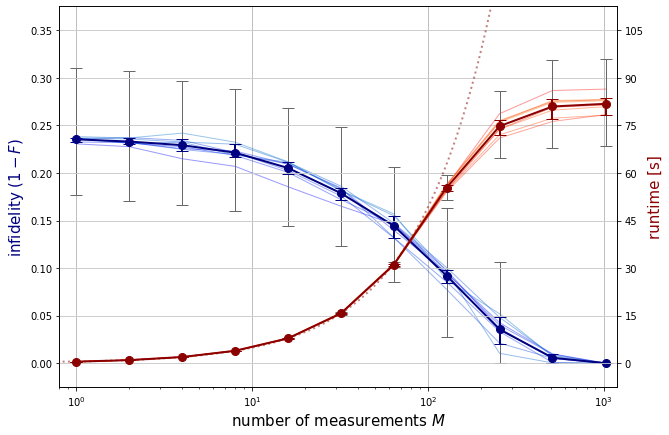

In [23]:
tt = np.concatenate((t[:, 0:11, :], t[:, 14:, :]), axis=1)

fid_avg = np.average(1 - fid, axis=(1, 2))
fid_8_total = [fid_avg - np.percentile(1 - fid, 87.5, axis=(1, 2)), np.percentile(1 - fid, 12.5, axis=(1, 2)) - fid_avg]
fid_8_prep = [fid_avg - np.percentile(np.average(1 - fid, axis=1), 87.5, axis= 1), np.percentile(np.average(1 - fid, axis=1), 12.5, axis=1) - fid_avg]

t_avg = np.average(tt, axis=(1, 2))
t_8_total = [t_avg - np.percentile(tt, 87.5, axis=(1, 2)), np.percentile(tt, 12.5, axis=(1, 2)) - t_avg]
t_8_prep = [t_avg - np.percentile(np.average(tt, axis=1), 87.5, axis= 1), np.percentile(np.average(tt, axis=1), 12.5, axis=1) - t_avg]

# Plot fidelities
fig, ax1 = plt.subplots(figsize=(10, 7))
ax2 = ax1.twinx()

m_s = 8
cmap = plt.get_cmap('winter')
c_ind = np.argsort(np.average(1 - fid[0, :, :], axis=0))                         
for c_i, i in enumerate(c_ind):
    ax1.plot(n_meas, np.average(1 - fid[:, :, i], axis=1),  c= cmap(c_i /len(fid[1])), ls='-', marker='o', ms= 0, lw= 1, alpha=0.4)    
ax1.errorbar(n_meas, fid_avg, yerr= fid_8_total, ls='-', ms= 0, c= 'dimgrey', lw= 0, capsize=6, elinewidth=1)
ax1.errorbar(n_meas, fid_avg, yerr= fid_8_prep, ls='-', marker='o', ms= m_s, c='navy', lw= 2, capsize=6, elinewidth=2)
#ax1.errorbar(n_meas, fid_avg, yerr= fid_8_total, marker='o', ms= m_s, c= 'navy', lw= 0, capsize=0, elinewidth=0)


m_s = 8
cmap = plt.get_cmap('autumn')

coef = np.polyfit(n_meas[:6], np.average(tt[:6], axis=(1,2)), 1)[0] 
x_t = np.linspace(0, n_meas[-1], 1000)
ax2.plot(x_t, coef * x_t, ls=':', c='darkred', lw= 2, alpha= 0.5)

for c_i, i in enumerate(c_ind):
    ax2.plot(n_meas, np.average(tt[:, :, i], axis=1),  c= cmap(c_i /len(fid[1])), ls='-', marker='o', ms= 0, lw= 1, alpha=0.4)    
ax2.errorbar(n_meas, t_avg, yerr= t_8_total, ls='-', ms= 0, c= 'dimgrey', lw= 0, capsize=6, elinewidth=1)
ax2.errorbar(n_meas, t_avg, yerr= t_8_prep, ls='-', marker='o', ms= m_s, c='darkred', lw= 2, capsize=6, elinewidth=2)
#ax2.errorbar(n_meas, t_avg, yerr= t_8_total, marker='o', ms= m_s, c= 'darkred', lw= 0, capsize=0, elinewidth=0)


fs = 15
ax1.set_xscale('log', base=10)
ax1.set_xlim(0.8, 1200)
ax1.set_xlabel(r'number of measurements $M$', fontsize=fs)
ax1.set_xticks([1, 10, 100, 1000], fontsize=fs)
ax1.set_ylabel(r'infidelity ($1-F$)', fontsize=fs, c= 'navy')
ax1.set_yticks(np.linspace(0, 0.35, 8), fontsize=fs)
ax1.set_ylim(-0.025, 0.375)
ax1.grid()

ax2.set_ylabel(r'runtime [s]', fontsize=fs, c= 'darkred')
ax2.set_yticks(np.linspace(0, 105, 8), fontsize=fs)
ax2.set_ylim(-7.5, 112.5)

plt.grid(c='lightgray')
plt.show()

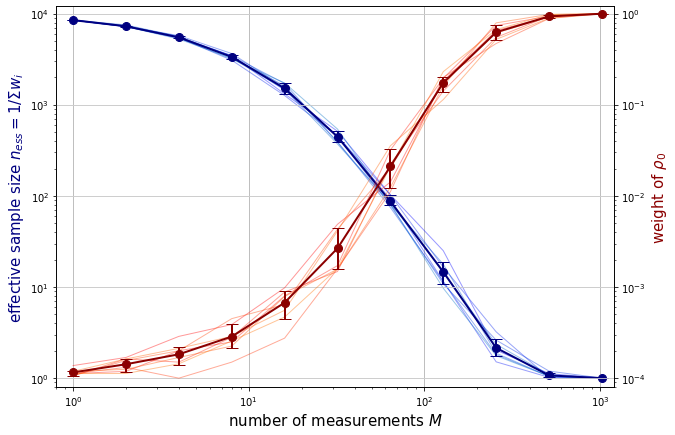

In [24]:
n_ess_avg = np.average(n_ess, axis=(1, 2))
n_ess_8_total = [n_ess_avg - np.percentile(n_ess, 87.5, axis=(1, 2)), np.percentile(n_ess, 12.5, axis=(1, 2)) - n_ess_avg]
n_ess_8_prep = [n_ess_avg - np.percentile(np.average(n_ess, axis=1), 87.5, axis= 1), np.percentile(np.average(n_ess, axis=1), 12.5, axis=1) - n_ess_avg]

w_avg = np.average(w_rho, axis=(1, 2))
w_8_total = [w_avg - np.percentile(w_rho, 87.5, axis=(1, 2)), np.percentile(w_rho, 12.5, axis=(1, 2)) - w_avg]
w_8_prep = [w_avg - np.percentile(np.average(w_rho, axis=1), 87.5, axis= 1), np.percentile(np.average(w_rho, axis=1), 12.5, axis=1) - w_avg]

# Plot n_esselities
fig, ax1 = plt.subplots(figsize=(10, 7))
ax2 = ax1.twinx()

m_s = 8
cmap = plt.get_cmap('winter')
c_ind = np.argsort(np.average(n_ess[0, :, :], axis=0))                         
for c_i, i in enumerate(c_ind):
    ax1.plot(n_meas, np.average(n_ess[:, :, i], axis=1),  c= cmap(c_i /len(n_ess[1])), ls='-', marker='o', ms= 0, lw= 1, alpha=0.4)    
ax1.errorbar(n_meas, n_ess_avg, yerr= n_ess_8_prep, ls='-', marker='o', ms= m_s, c='navy', lw= 2, capsize=6, elinewidth=2)
#ax1.errorbar(n_meas, n_ess_avg, yerr= n_ess_8_total, marker='o', ms= m_s, c= 'navy', lw= 0, capsize=0, elinewidth=0)

m_s = 8
cmap = plt.get_cmap('autumn')

for c_i, i in enumerate(c_ind):
    ax2.plot(n_meas, np.average(w_rho[:, :, i], axis=1),  c= cmap(c_i /len(n_ess[1])), ls='-', marker='o', ms= 0, lw= 1, alpha=0.4)    
ax2.errorbar(n_meas, w_avg, yerr= w_8_prep, ls='-', marker='o', ms= m_s, c='darkred', lw= 2, capsize=6, elinewidth=2)
#ax2.errorbar(n_meas, t_avg, yerr= t_8_total, marker='o', ms= m_s, c= 'darkred', lw= 0, capsize=0, elinewidth=0)

fs = 15
ax1.set_xscale('log', base=10)
ax1.set_yscale('log', base=10)
ax1.set_xlim(0.8, 1200)
ax1.set_xlabel(r'number of measurements $M$', fontsize=fs)
ax1.set_xticks([1, 10, 100, 1000], fontsize=fs)
ax1.set_ylabel(r'effective sample size $n_{ess} = 1 / \Sigma w_i$', fontsize=fs, c= 'navy')
ax1.set_yticks([1, 10, 100, 1000, 10000], fontsize=fs)
ax1.set_ylim(0.8, 12000)
ax1.grid()

ax2.set_ylabel(r'weight of $\rho_0$', fontsize=fs, c= 'darkred')
ax2.set_yticks(np.linspace(0, 1, 8), fontsize=fs)
ax2.set_yscale('log', base=10)
ax2.set_ylim(0.00008, 1.2)

plt.grid(c='lightgray')
plt.show()
